# Extract patches for the environmental rasters

In [3]:
import os
import sys
from pathlib import Path
import numpy as np
sys.path.append(str(Path().resolve().parent))
sys.path.append(str(Path().resolve().parent.parent))

from data_processing.environmental.environmental_raster import PatchExtractor
import matplotlib.pyplot as plt

In [5]:
DATA_PATH = Path("/miniscratch/tengmeli/GLC/data/rasters/")

In [5]:
extractor = PatchExtractor(DATA_PATH, country="USA", size = 256)
extractor.add_all_rasters()
print("Number of rasters: {}".format(len(extractor)))

Number of rasters: 27


There are 19 bioclimatic and 8 pedologic variables provided as rasters in the WGS84 coordinates system, from WorldClim 1.4, a commonly used climatic database for SDM applications. One pixel corresponds to 30arcsec (~1km) for the bioclimatic data and to 250m for the pedologic data. 

In [7]:
lat, long = 40.730610, -73.93
patch = extractor[lat, long]

print("Patch shape: {}".format(patch.shape))
print("Data type: {}".format(patch.dtype))

Patch shape: (27, 256, 256)
Data type: float32


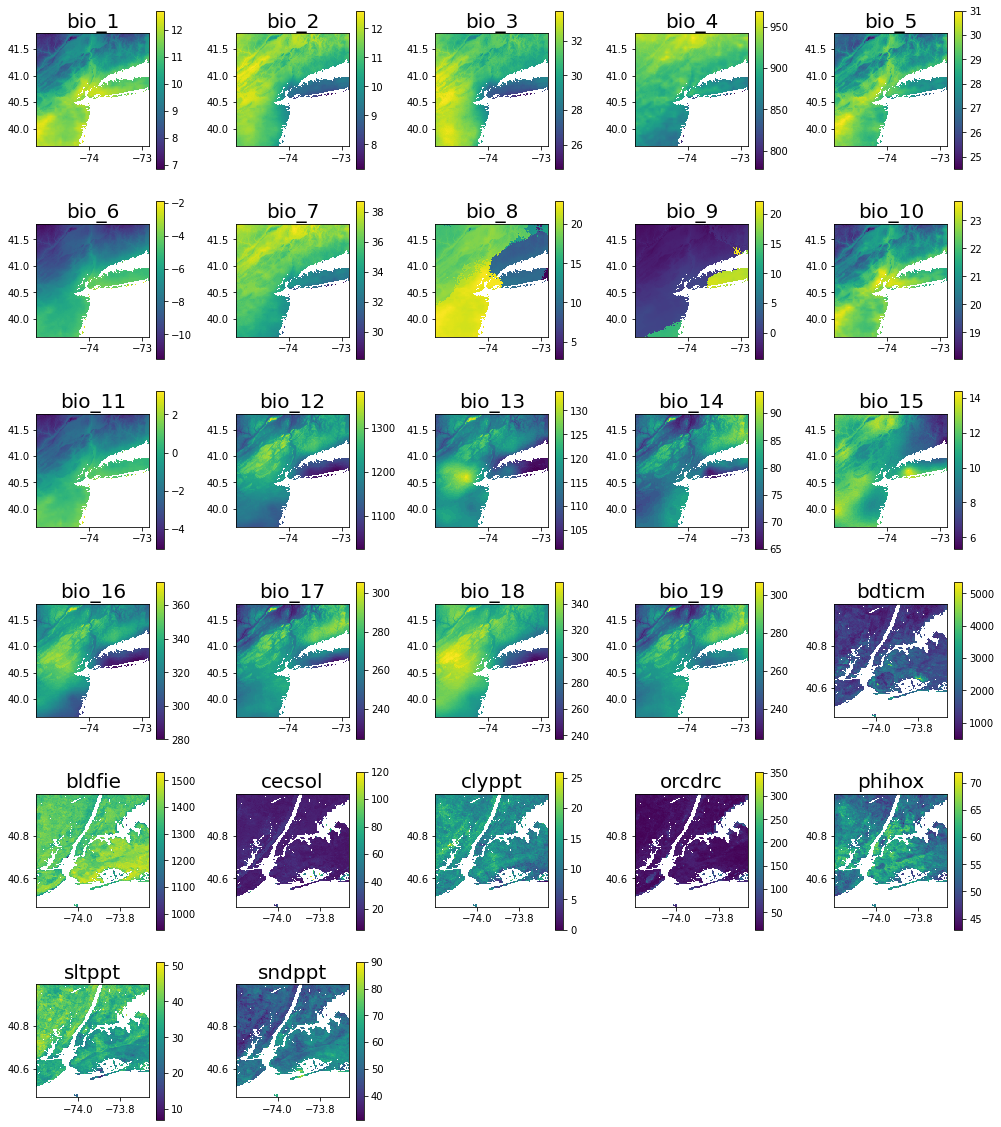

In [10]:
fig = plt.figure(figsize=(14, 16))
extractor.plot((lat, long), fig=fig)

## Extract value at specified lat-long and save them in dataframe 

In [1]:
import pandas as pd

In [6]:
extractor = PatchExtractor(DATA_PATH, country="USA", size = 1)
extractor.add_all_rasters()
print("Number of rasters: {}".format(len(extractor)))

Number of rasters: 27


In [7]:

rnd = [40.730610, 40.208127, 43.512592 ]
rnd2 = [-73.93, -113.016007, -122.068742]
DUMMY_df  = pd.DataFrame(
        {'LATITUDE': rnd, 'LONGITUDE': rnd2})

In [8]:
DUMMY_df

,LATITUDE,LONGITUDE
0,40.730610,-73.930000
1,40.208127,-113.016007
2,43.512592,-122.068742


In [9]:
df_ref = DUMMY_df #ADD DF TO WHICH WE WANT TO ADD ENV VARIABLES

In [10]:
var_names = [extractor.rasters_us[i].name for i in range(len(extractor))]

In [11]:
var_to_add = [elem for elem in var_names if elem not in df_ref.columns]

In [12]:
variables = df_ref.apply(lambda row: extractor[row.LATITUDE, row.LONGITUDE], axis=1)

In [42]:
values = [variables.apply(lambda row: row[:][i]).values.tolist() for i in range(len(var_to_add))]

In [44]:
for i in range(len(var_to_add)):
    df_ref[var_to_add[i]] = values[i]

In [46]:
df_ref.head()

,LATITUDE,LONGITUDE,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,...,bio_18,bio_19,bdticm,bldfie,cecsol,clyppt,orcdrc,phihox,sltppt,sndppt
0,40.730610,-73.930000,12.258333,9.250000,27.448071,902.569153,29.500000,-4.2,33.700001,22.700001,...,312.0,262.0,1815.0,1466.0,14.0,14.0,19.0,56.0,33.0,53.0
1,40.208127,-113.016007,10.770833,15.658334,36.079109,991.336243,34.599998,-8.8,43.399998,15.266666,...,40.0,39.0,5067.0,1502.0,30.0,31.0,6.0,84.0,45.0,24.0
2,43.512592,-122.068742,3.879167,13.575000,44.654606,593.531250,22.600000,-7.8,30.400002,-1.983333,...,101.0,623.0,1805.0,1102.0,21.0,6.0,52.0,56.0,28.0,66.0


In [ ]:
df_ref.to_csv("final_data_with_bioclim.csv")